# Unsupervised Learning

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [5]:
x_train = x_train.reshape((x_train.shape[0], np.prod((x_train.shape[1], x_train.shape[2]))))
x_test = x_test.reshape((x_test.shape[0], np.prod(x_test.shape[1:])))
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [10]:
image_dim = 784
encoding_dim = 32

In [29]:
input_image = tf.keras.layers.Input(shape = (image_dim, ))
encoded_image = tf.keras.layers.Dense(encoding_dim, activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-05))(input_image)
encoder = tf.keras.models.Model(input_image, encoded_image)

decoded_image = tf.keras.layers.Dense(image_dim, activation='sigmoid')(encoded_image)
autoencoder = tf.keras.models.Model(input_image, decoded_image)

In [30]:
encoded_input = tf.keras.layers.Input(shape = (encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = tf.keras.models.Model(encoded_input, decoder_layer(encoded_input))

In [39]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [40]:
checkpointer1 = tf.keras.callbacks.ModelCheckpoint(filepath = 'model.weights.best.hdf5', verbose = 2, save_best_only = True)
checkpointer2 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta = 0.0005, patience = 2, mode='auto', verbose = 2)

In [41]:
epochs = 50
autoencoder.fit(x_train, x_train, epochs=epochs, batch_size=256, verbose = 2,callbacks = [checkpointer1], shuffle = True, validation_data=(x_test, x_test))

encoded_images = encoder.predict(x_test)
decoded_images = decoder.predict(encoded_images)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50

Epoch 00001: val_loss improved from inf to 0.34720, saving model to model.weights.best.hdf5
60000/60000 - 5s - loss: 0.4157 - val_loss: 0.3472
Epoch 2/50

Epoch 00002: val_loss improved from 0.34720 to 0.32583, saving model to model.weights.best.hdf5
60000/60000 - 3s - loss: 0.3331 - val_loss: 0.3258
Epoch 3/50

Epoch 00003: val_loss improved from 0.32583 to 0.31499, saving model to model.weights.best.hdf5
60000/60000 - 3s - loss: 0.3179 - val_loss: 0.3150
Epoch 4/50

Epoch 00004: val_loss improved from 0.31499 to 0.30793, saving model to model.weights.best.hdf5
60000/60000 - 5s - loss: 0.3092 - val_loss: 0.3079
Epoch 5/50

Epoch 00005: val_loss improved from 0.30793 to 0.30330, saving model to model.weights.best.hdf5
60000/60000 - 4s - loss: 0.3034 - val_loss: 0.3033
Epoch 6/50

Epoch 00006: val_loss improved from 0.30330 to 0.30008, saving model to model.weights.best.hdf5
60000/60000 - 3s - loss: 0.2996 - val_loss: 0.3001


In [34]:
#In order to load the wieights saved by the model
autoencoder.load_weights('model.weights.best.hdf5')
encoded_images = encoder.predict(x_test)
decoded_images = decoder.predict(encoded_images)

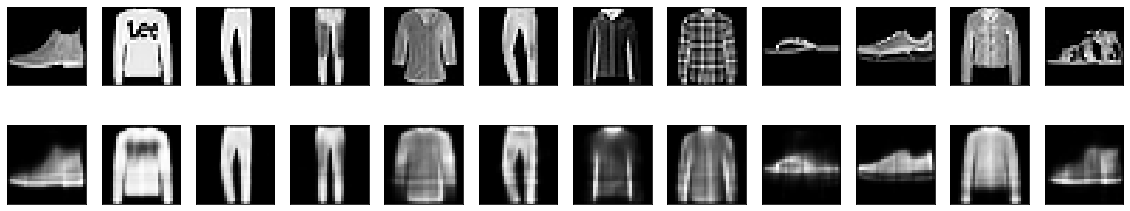

In [42]:
n_items = 12
plt.figure(figsize = (20, 4))
for i in range(n_items):
    graph = plt.subplot(2, n_items, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    graph.get_xaxis().set_visible(False)
    graph.get_yaxis().set_visible(False)

    graph = plt.subplot(2, n_items, i+1+n_items)
    plt.imshow(np.reshape(decoded_images[i], (28, 28)))
    plt.gray()
    graph.get_xaxis().set_visible(False)
    graph.get_yaxis().set_visible(False)
plt.show()

# Denoising

In [2]:
(train_x, _), (test_x, _) = fashion_mnist.load_data()

train_x = train_x.astype('float32')/255.
test_x = test_x.astype('float32')/255.

print(train_x.shape)
print(test_x.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
test_x = test_x.reshape((test_x.shape[0], 28, 28, 1))

In [4]:
print(train_x.shape)
print(test_x.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
noise = .5
train_x_noisy = train_x+noise*np.random.normal(loc=0.0, scale=1.0, size = train_x.shape)
test_x_noisy = test_x + noise*np.random.normal(loc=0.0, scale=1.0, size = test_x.shape)

In [6]:
np.clip(train_x_noisy, 0., 1.)
np.clip(test_x_noisy, 0., 1.)

array([[[[0.25635693],
         [0.        ],
         [0.22588085],
         ...,
         [0.        ],
         [0.36751604],
         [0.96488923]],

        [[0.        ],
         [0.09300512],
         [0.08144486],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.95232314],
         [0.        ],
         [0.53265494],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.62821977],
         [0.02156235],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.00615975],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [1.        ],
         [0.        ],
         [0.11994079]]],


       [[[0.13207502],
         [0.        ],
         [0.  

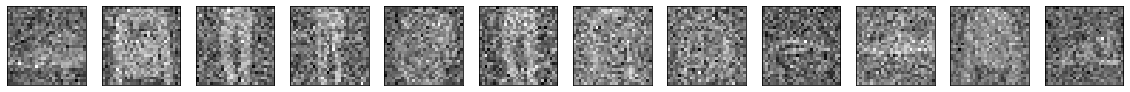

In [7]:
n_items = 12

plt.figure(figsize = (20, 2))
for i in range(n_items):
    display = plt.subplot(1, n_items, i+1)
    plt.imshow(test_x_noisy[i].reshape(28, 28))
    plt.gray()
    display.get_xaxis().set_visible(False)
    display.get_yaxis().set_visible(False)
plt.show()

### Encoding

In [8]:
input_image = tf.keras.layers.Input(shape=(28, 28, 1))
im = tf.keras.layers.Conv2D(filters=32, kernel_size = (3, 3), activation = 'relu', padding='same')(input_image)
print(im.shape)

im = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same')(im)
print(im.shape)
im = tf.keras.layers.Conv2D(filters=32, kernel_size = (3, 3), activation = 'relu', padding='same')(im)
encoded = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same')(im)
print(encoded.shape)

(None, 28, 28, 32)
(None, 14, 14, 32)
(None, 7, 7, 32)


### Decoding

In [9]:
im = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding = 'same')(encoded)
print(im.shape)
im = tf.keras.layers.UpSampling2D((2, 2))(im)
print(im.shape)
im = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(im)
print(im.shape)
im = tf.keras.layers.UpSampling2D((2, 2))(im)
print(im.shape)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(im)
print(decoded.shape)

(None, 7, 7, 32)
(None, 14, 14, 32)
(None, 14, 14, 32)
(None, 28, 28, 32)
(None, 28, 28, 1)


In [10]:
model = tf.keras.models.Model(input_image, decoded)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 32)        0     

In [12]:
model.compile(optimizer = 'adam', loss='binary_crossentropy')
tb = [tf.keras.callbacks.TensorBoard(log_dir='.\\tmp\\tb', write_graph=True)]

epochs = 100
batch_size = 128

model.fit(train_x_noisy, train_x, epochs=epochs, batch_size = batch_size, shuffle = True, validation_data=(test_x_noisy, test_x), callbacks=tb)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 270s 4ms/sample - loss: 0.3225 - val_loss: 0.3051
Epoch 2/100
60000/60000 [==============================] - 278s 5ms/sample - loss: 0.3002 - val_loss: 0.3004
Epoch 3/100
60000/60000 [==============================] - 276s 5ms/sample - loss: 0.2965 - val_loss: 0.2973
Epoch 4/100
13184/60000 [=====>........................] - ETA: 3:24 - loss: 0.2951

KeyboardInterrupt: 

In [ ]:
decoded_images = autoencoder.predict(test_noisy_x)
n_items = 10
plt.figure(figsize=(20, 2))
for item in range(n_items):
    display = plt.subplot(1, n_items, item+1)
    im = decoded_images[item].reshape(28, 28)
    plt.imshow(im, cmap='gray')
    display.get_xaxis().set_visible(False)
    display.get_yaxis().set_visible(False)
plt.show()